In [1]:
import numpy as np
import seaborn as sns
x = np.loadtxt("/Users/vipulkamboj/Downloads/logistic_x.txt")
y = np.loadtxt("/Users/vipulkamboj/Downloads/logistic_y.txt")

In [2]:
#Normalized Y 
y_norm=[]
for i in y:
    if i==1.:t=1.
    else:t=0.0
    y_norm.append(t)
y=np.array(y_norm)

In [3]:
#Normalize X
def normalize(X):
    m, n = X.shape  
    # Normalizing all the n features of X.
    for i in range(n):
        X = (X - X.mean(axis=0))/X.std(axis=0)        
    return X
x= normalize(x)

In [4]:
# Logistics Regression Prediction Code
def sigmoid(x):
    s = 1/(1+np.exp(-x))
    return s

def predict(x, theta,bias):
    preds = sigmoid(np.dot(x, theta)+bias)
    if preds>0.5: pred=1.0
    else:pred=0.0
    return pred

def log_loss(y_true, y_predicted): # Log Loss or Binary Cross Entropy
    epsilon = 1e-15
    y_predicted_new = [max(i, epsilon) for i in y_predicted]
    y_predicted_new = [min(i, 1-epsilon) for i in y_predicted_new]
    y_predicted_new = np.array(y_predicted_new)
    return -np.mean(y_true*np.log(y_predicted_new) - (1-y_true)*np.log(1-y_predicted_new))


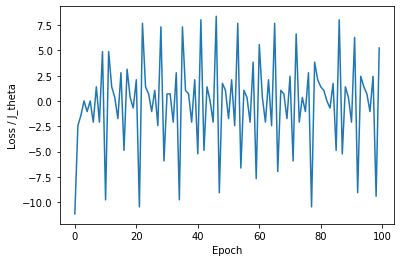

In [5]:
#Initialize the Theta and bias with Zero
theta = np.array([0.,0.], dtype=np.float64)
bias = np.array([0.], dtype=np.float64)

lr=0.1 # learning rate
iter_num=100 # numbe of iteration
loss_list=[] # loss list
theta_list=[] # theta list
bias_list=[] # bias list
# Start Training
for iter in range(iter_num):
    theta_gradient_list=[]
    bias_gradient_list=[]
    for i in range(x.shape[0]):
        theta_gradient_list.append(x[i].T.dot(predict(x[i],theta,bias)-y[i]))
        bias_gradient_list.append(predict(x[i],theta,bias)-y[i])
    #Calculate theta gradient (batch gradient)
    theta_gradient = sum(theta_gradient_list)/len(theta_gradient_list)
    #Calculate bias gradient (batch gradient)
    bias_gradient = sum(bias_gradient_list)/len(bias_gradient_list)
    #Tune parameter with gradient
    theta = theta - lr*theta_gradient
    bias = bias - lr*bias_gradient
    #Prediction with updated paramenetrs
    y_pred=[]
    for i in range(x.shape[0]):
        y_pred.append(predict(x[i],theta,bias))
    #Save all theta and bias in list
    theta_list.append(theta)
    bias_list.append(bias)
    
    y_pred=np.array(y_pred)
    # Calculate Loss / J_theta and save it into Loss_list
    #loss_list.append((y.shape[0]-np.sum(y_pred==y))/y.shape[0])
    loss_list.append(log_loss(y,y_pred))
#plot Loss vs Epoch  
import matplotlib.pyplot as plt
plt.plot(range(iter_num),loss_list)
plt.xlabel("Epoch")
plt.ylabel("Loss / J_theta")
plt.show()

In [6]:
# Calculate Best Parameters: Best Theta and best Bias
index = np.argmin(np.array(loss_list))
print("index of lowest loss: ",index)
print("Lowest Loss / J_Theta: ",loss_list[index])
theta = theta_list[index]
bias = bias_list[index]
print("best_theta= ",theta)
print("best_bias= ",bias)


index of lowest loss:  0
Lowest Loss / J_Theta:  -11.16430739146372
best_theta=  [0.02492101 0.0318999 ]
best_bias=  [0.05050505]


In [7]:
# Inverse Y 
y_norm=[]
for i in y:
    if i==1.:t=1.
    else:t=-1.0
    y_norm.append(t)
y=np.array(y_norm)

[-0.21941297 -3.42808566]


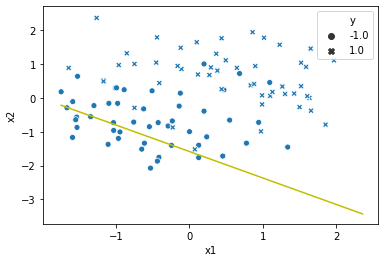

In [8]:
#Plot the Training Data X1, X2 with Y along with Boundry Line
x=x.T
import pandas as pd
data = pd.DataFrame({"x1":x[0],"x2":x[1],"y":y})
x1 = [min(x.T[:,0]), max(x.T[:,1])]
c = -bias[0]/theta[1]
m = -(theta[0]/theta[1])
x2= np.dot(m,x1)+c
plt.plot(x1, x2,"y-")
print(x2)
sns.scatterplot(data = data,x="x1",y="x2",style="y")
plt.show()
